# Alfido 2nd Project : Uber Data Analysis 

## Importing the Library

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Reading the data 

In [68]:
df = pd.read_csv("uberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Info () gives the data type and also says the indirectly null values 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Describe applies for the only numerical columns 

In [70]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# checking for the null values 

In [71]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Replace null values in the 'PURPOSE' column with 'Unknown'

In [72]:
df.dropna(subset=['PURPOSE'], inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


# checking for the null values (again)

In [73]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [99]:
# Convert date columns to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Extract features like day of the week, hour of the day, etc.
df['Day_of_Week'] = df['START_DATE'].dt.day_name()
df['Hour_of_Day'] = df['START_DATE'].dt.hour


# Convert 'START_DATE' and 'END_DATE' columns to datetime with specified format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m-%d-%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m-%d-%Y %H:%M')

# Visualizations or EDA 

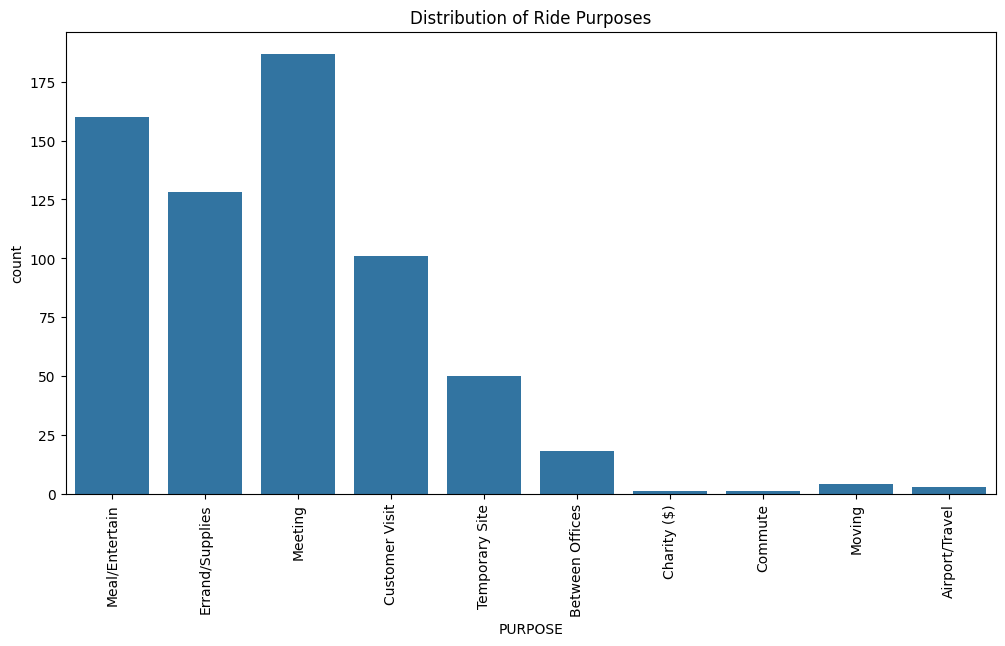

In [74]:
# Visualization - I  Distribution of ride purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='PURPOSE', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Ride Purposes')
plt.show() 

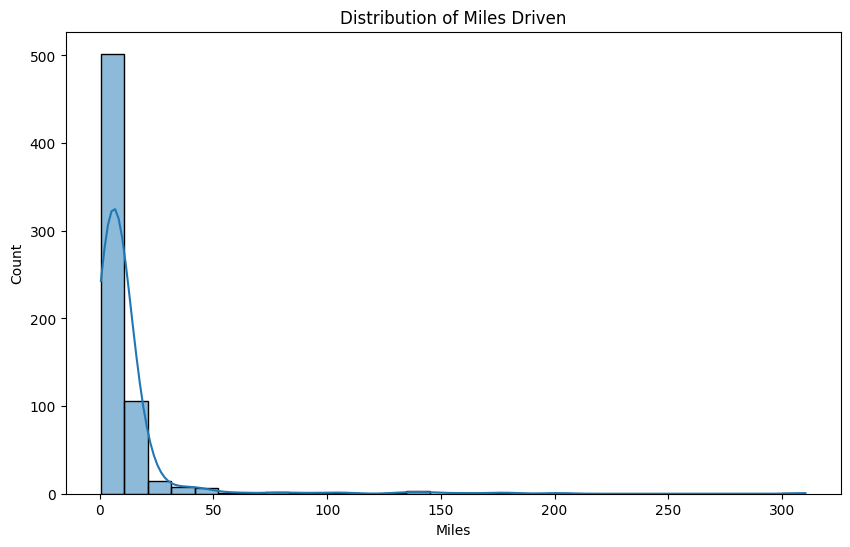

In [81]:
#  Visualization - II  Distribution of miles driven
plt.figure(figsize=(10, 6))
sns.histplot(x='MILES', data=df, bins=30, kde=True)
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.show()

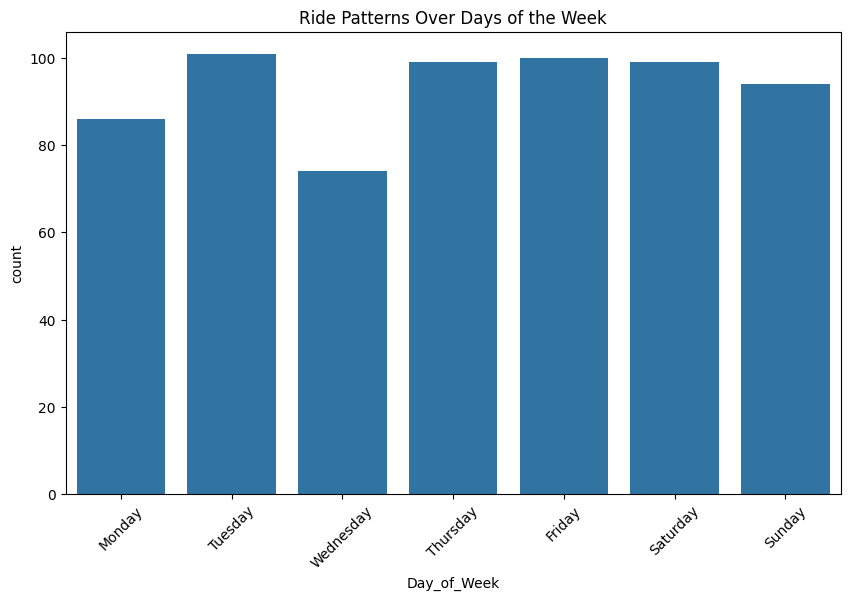

In [91]:
# # Visualization - III Analyze ride patterns over time
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.title('Ride Patterns Over Days of the Week')
plt.show()

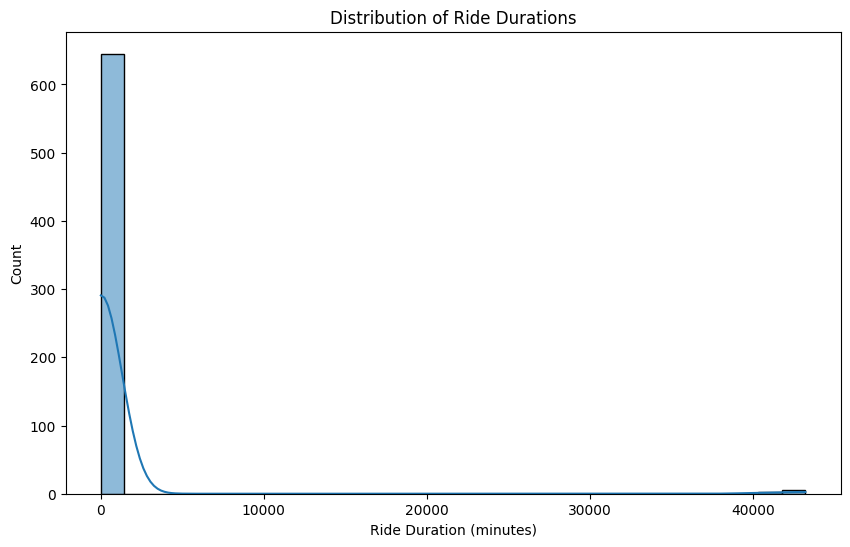

In [94]:
#  Visualization - IV Analyze ride duration
plt.figure(figsize=(10, 6))
sns.histplot(x='RIDE_DURATION', data=df, bins=30, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.show()

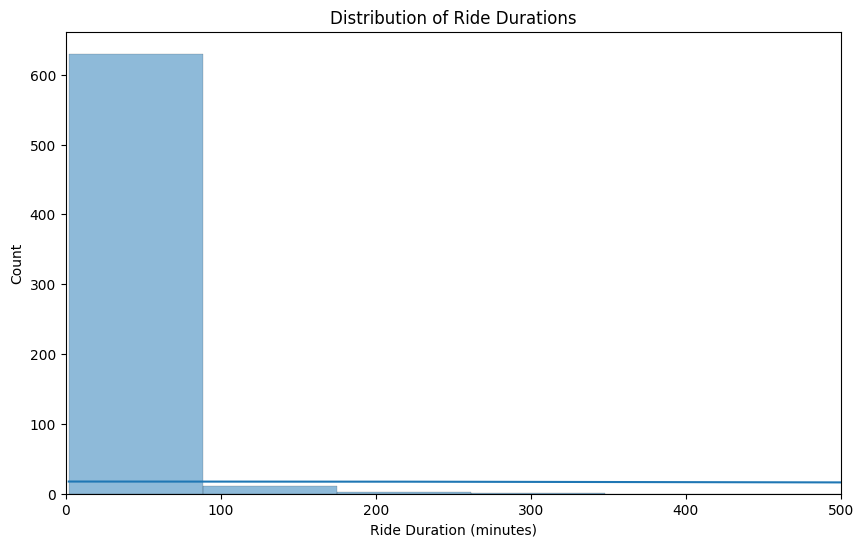

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(x='RIDE_DURATION', data=df, bins=500, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.xlim(0, 500)  # Set the x-axis limits to focus on the relevant range
plt.show()


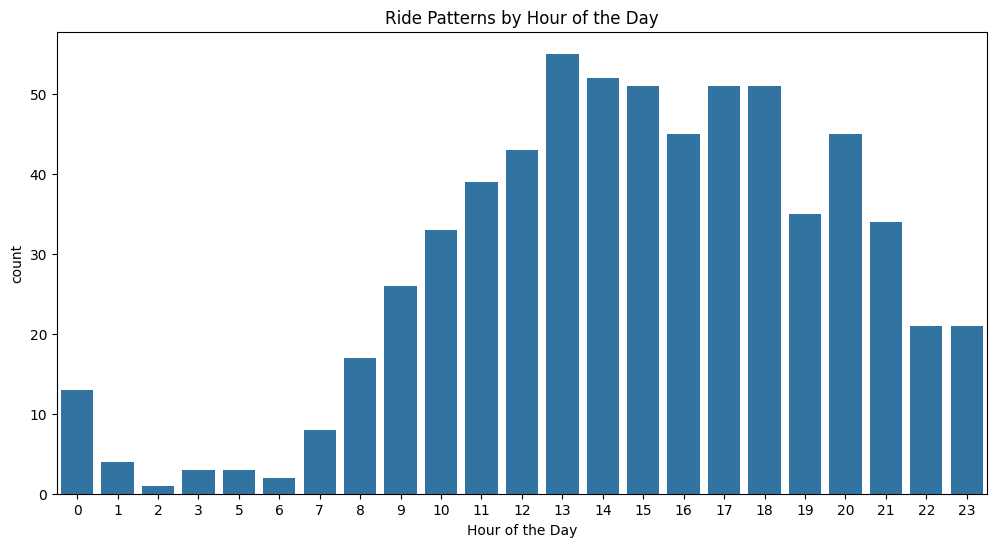

In [96]:
# Analyze ride patterns by the hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour_of_Day', data=df)
plt.title('Ride Patterns by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.show()

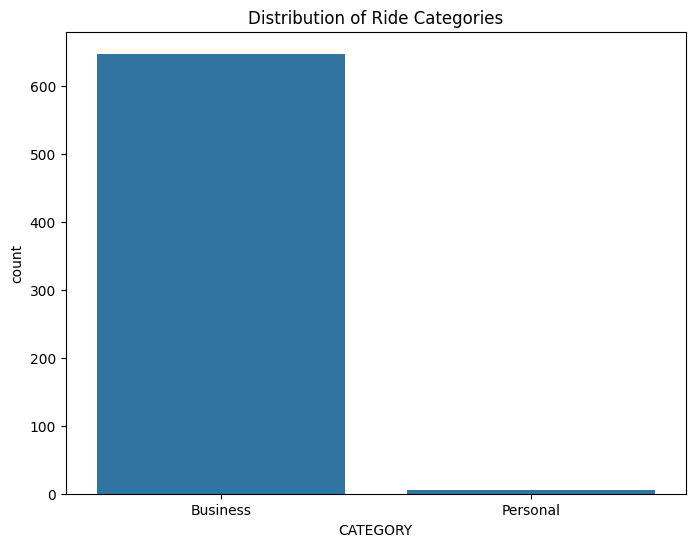

In [97]:
# Distribution of ride categories
plt.figure(figsize=(8, 6))
sns.countplot(x='CATEGORY', data=df)
plt.title('Distribution of Ride Categories')
plt.show()

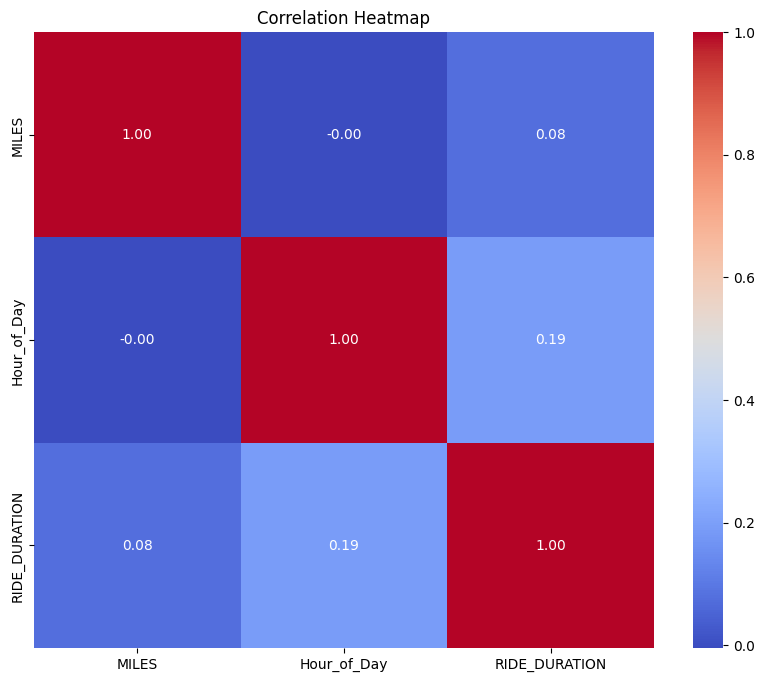

In [98]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
